## Titanic Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

titanic_data = pd.read_csv('train.csv')
titanic_data.head(10)

In [15]:
print("Number of passengers in original data:" + str(len(titanic_data.index)))

Number of passengers in original data:891


## Analyzing Data

<AxesSubplot:xlabel='Survived', ylabel='count'>

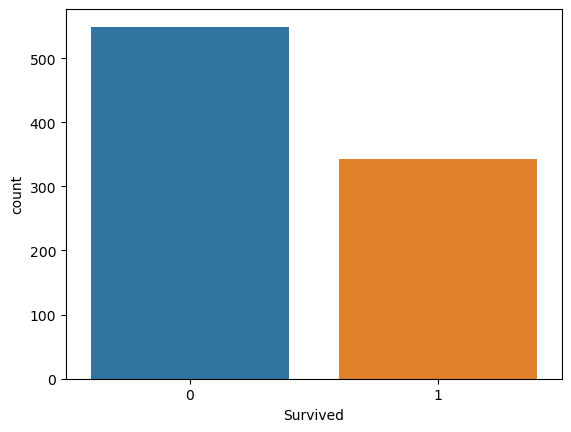

In [18]:
sns.countplot(x = "Survived", data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

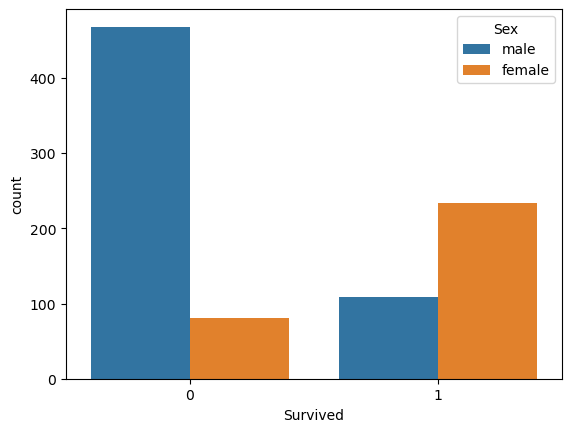

In [19]:
sns.countplot(x = 'Survived', hue = 'Sex', data = titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

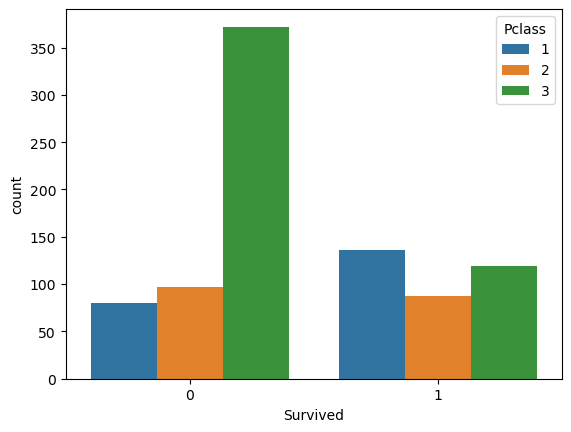

In [21]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = titanic_data)

<AxesSubplot:ylabel='Frequency'>

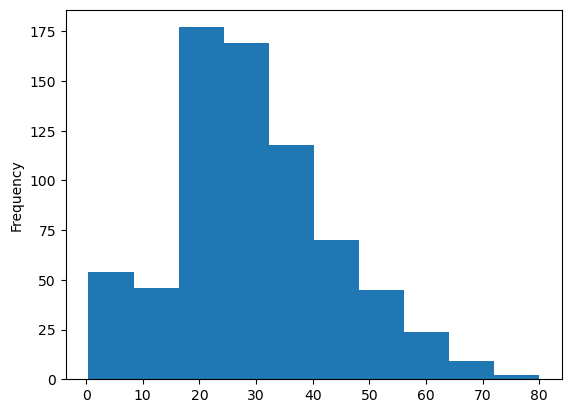

In [22]:
titanic_data['Age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

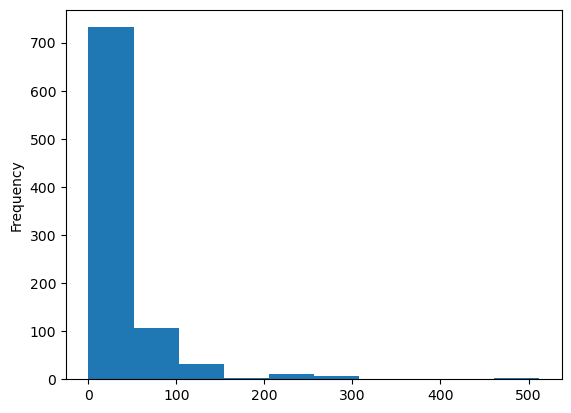

In [23]:
titanic_data['Fare'].plot.hist()

In [25]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

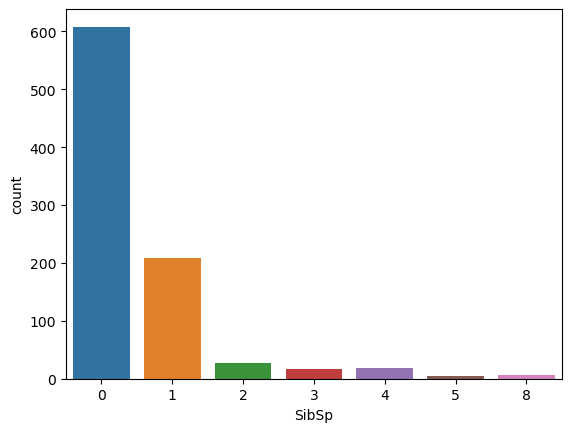

In [26]:
sns.countplot(x = 'SibSp', data=titanic_data)

## Data Wrangling

In [27]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

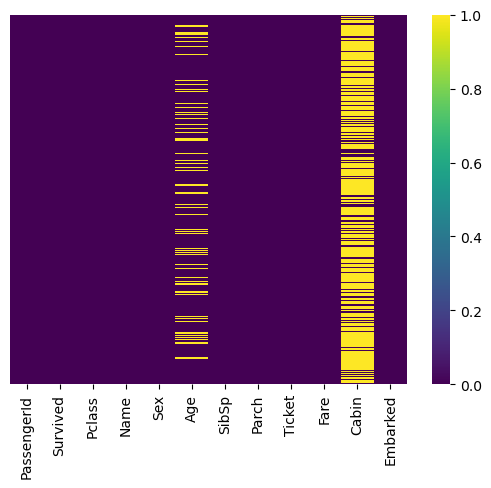

In [29]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cmap='viridis')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

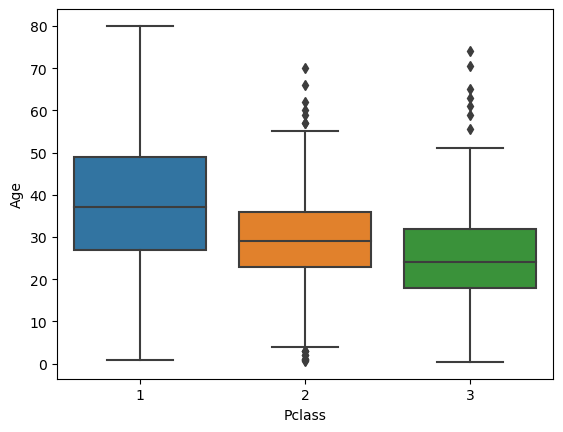

In [30]:
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic_data)

In [31]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
titanic_data.drop("Cabin", axis = 1, inplace=True)

In [33]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [34]:
titanic_data.dropna(inplace=True)

<AxesSubplot:>

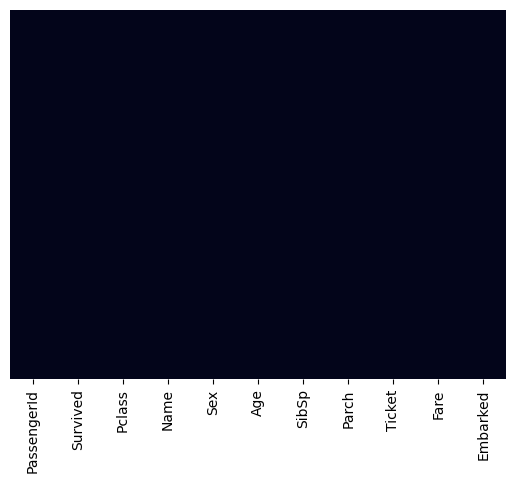

In [36]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False)

In [37]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [38]:
 sex = pd.get_dummies(titanic_data['Sex'], drop_first=True)
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [40]:
embark = pd.get_dummies(titanic_data['Embarked'], drop_first=True)
embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [41]:
Pcl = pd.get_dummies(titanic_data['Pclass'], drop_first=True)
Pcl.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [42]:
titanic_data = pd.concat([titanic_data, sex, embark, Pcl], axis = 1)
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [44]:
titanic_data.drop(['Sex', 'Name', 'Embarked', "Pclass", 'PassengerId', 'Ticket'], axis = 1, inplace=True)
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


## Train & Test Data 

In [45]:
X = titanic_data.drop('Survived', axis = 1)
y = titanic_data['Survived']

In [49]:
 from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [51]:
from sklearn.linear_model import LogisticRegression

In [68]:
logmodel = LogisticRegression()

In [69]:
logmodel.fit(X_train, y_train)

C:\Users\rekha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\rekha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
predictions = logmodel.predict(X_test)

C:\Users\rekha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [71]:
from sklearn.metrics import classification_report

In [72]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.80      0.81      0.81       126\n           1       0.72      0.72      0.72        88\n\n    accuracy                           0.77       214\n   macro avg       0.76      0.76      0.76       214\nweighted avg       0.77      0.77      0.77       214\n'

In [73]:
from sklearn.metrics import confusion_matrix

In [74]:
confusion_matrix(y_test, predictions)

array([[102,  24],
       [ 25,  63]], dtype=int64)

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
accuracy_score(y_test, predictions)

0.7710280373831776

## SUV PREDICTIONS

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
dataset = pd.read_csv('anaconda3\suv_data.csv')

In [81]:
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [84]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [86]:
X, y

(array([[    19,  19000],
        [    35,  20000],
        [    26,  43000],
        [    27,  57000],
        [    19,  76000],
        [    27,  58000],
        [    27,  84000],
        [    32, 150000],
        [    25,  33000],
        [    35,  65000],
        [    26,  80000],
        [    26,  52000],
        [    20,  86000],
        [    32,  18000],
        [    18,  82000],
        [    29,  80000],
        [    47,  25000],
        [    45,  26000],
        [    46,  28000],
        [    48,  29000],
        [    45,  22000],
        [    47,  49000],
        [    48,  41000],
        [    45,  22000],
        [    46,  23000],
        [    47,  20000],
        [    49,  28000],
        [    47,  30000],
        [    29,  43000],
        [    31,  18000],
        [    31,  74000],
        [    27, 137000],
        [    21,  16000],
        [    28,  44000],
        [    27,  90000],
        [    35,  27000],
        [    33,  28000],
        [    30,  49000],
        [   

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [93]:
y_pred = classifier.predict(X_test)

In [94]:
from sklearn.metrics import accuracy_score

In [96]:
accuracy_score(y_test, y_pred)*100

87.0